# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%matplotlib notebook

## 1. Load data for event:

In [26]:
# Load data:
# archive_path = "data/mseed"
mseed_file_path = "data/20090121042009180_ice_flow_dir_corrected.m"
archive_vs_file = "file"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(mseed_file_path, starttime=starttime, endtime=endtime, archive_vs_file=archive_vs_file)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()


In [27]:
# st = st.select(station="ST01")

In [28]:
# # Add noise to data (for testing...) :
# for i in range(len(st)):
#     st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

## 2. Calculate splitting:

In [29]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, nonlinloc_event_path=nonlinloc_event_path) #(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.3 #0.1
splitting_event.win_S_pick_tolerance = 0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.2 #0.2
splitting_event.rotate_step_deg = 2.0 #1.0 #2.5
splitting_event.max_t_shift_s = 0.1 #0.12
splitting_event.n_win = 10 #5 #10
# splitting_event.perform_sp
splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV_and_XC") #(coord_system="LQT") #(coord_system="ZNE")
# splitting_event.perform_sws_analysis(coord_system="ZNE", sws_method="EV") #(coord_system="LQT") #(coord_system="ZNE")


/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:794: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC
/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:794: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC


No S phase pick for station: ST08 therefore skipping this station.
No S phase pick for station: ST06 therefore skipping this station.
No S phase pick for station: ST10 therefore skipping this station.


/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:794: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC
/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:794: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC
/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:794: RuntimeWarning: divide by zero encountered in true_divide
  grid_search_results_all_win_XC = 1. / grid_search_results_all_win_XC


No S phase pick for station: ST09 therefore skipping this station.
No S phase pick for station: ST07 therefore skipping this station.


station  phi_from_Q  phi_from_N  phi_from_U  phi_err     dt  dt_err  \
0    ST05        26.0       74.57        90.0     10.0  0.004   0.003   
0    ST04       -48.0       54.07        90.0      2.0  0.044   0.001   
0    ST02        38.0       67.53        90.0      2.0  0.042   0.001   
0    ST03       -82.0      -87.53        90.0      4.0  0.020   0.001   
0    ST01       -60.0       48.74        90.0      3.0  0.048   0.001   

   src_pol_from_N  src_pol_from_U  src_pol_from_N_err  src_pol_from_U_err  \
0      154.197600       89.946359           17.214782           10.537896   
0      165.368197       90.444536            6.430684            3.923207   
0      163.575889       90.504097            6.436617            2.740569   
0       26.199288       95.881281           12.880766           23.807806   
0      168.369942       88.213619            9.483751            6.103969   

        Q_w  ray_back_azi  ray_inc  
0  0.000000         48.57    141.8  
0  0.000000        282.07    163.9  
0  0.000000         29.53    160.6  
0  0.000000        354.47    144.4  
0 -0.764298        108.74    156.5

## 3. Plot result:

<IPython.core.display.Javascript object>


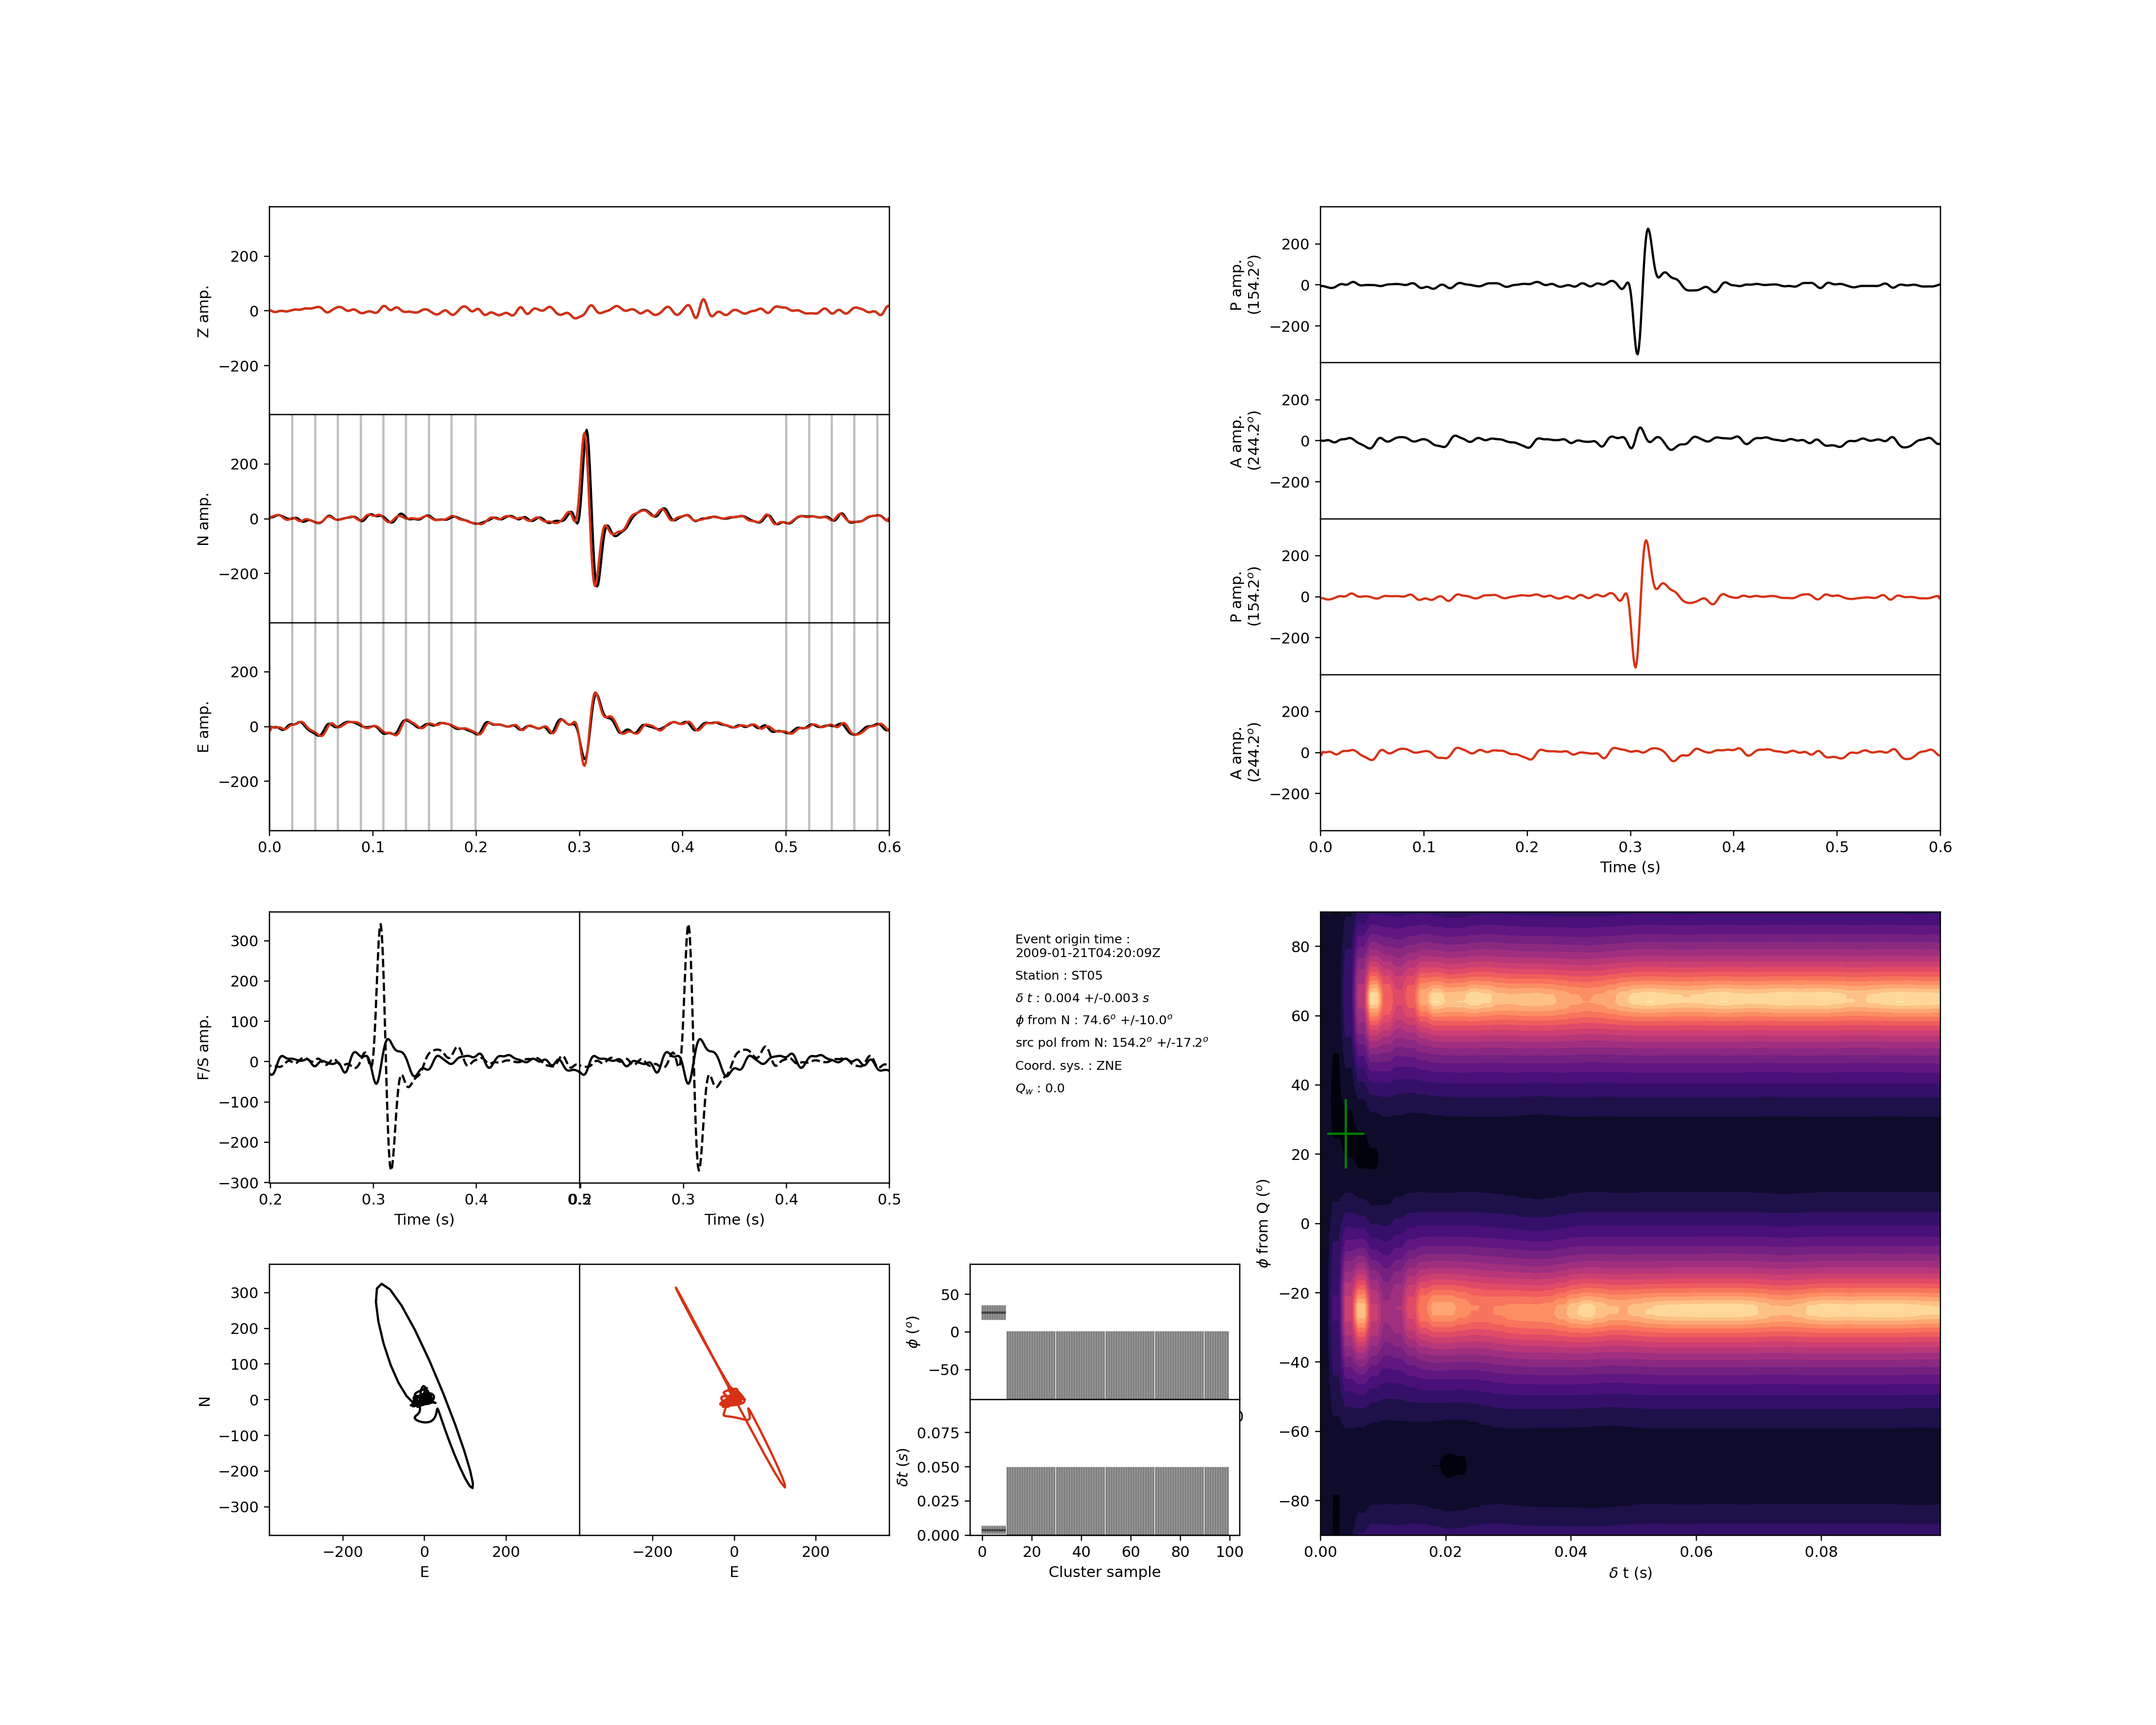

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1295: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>


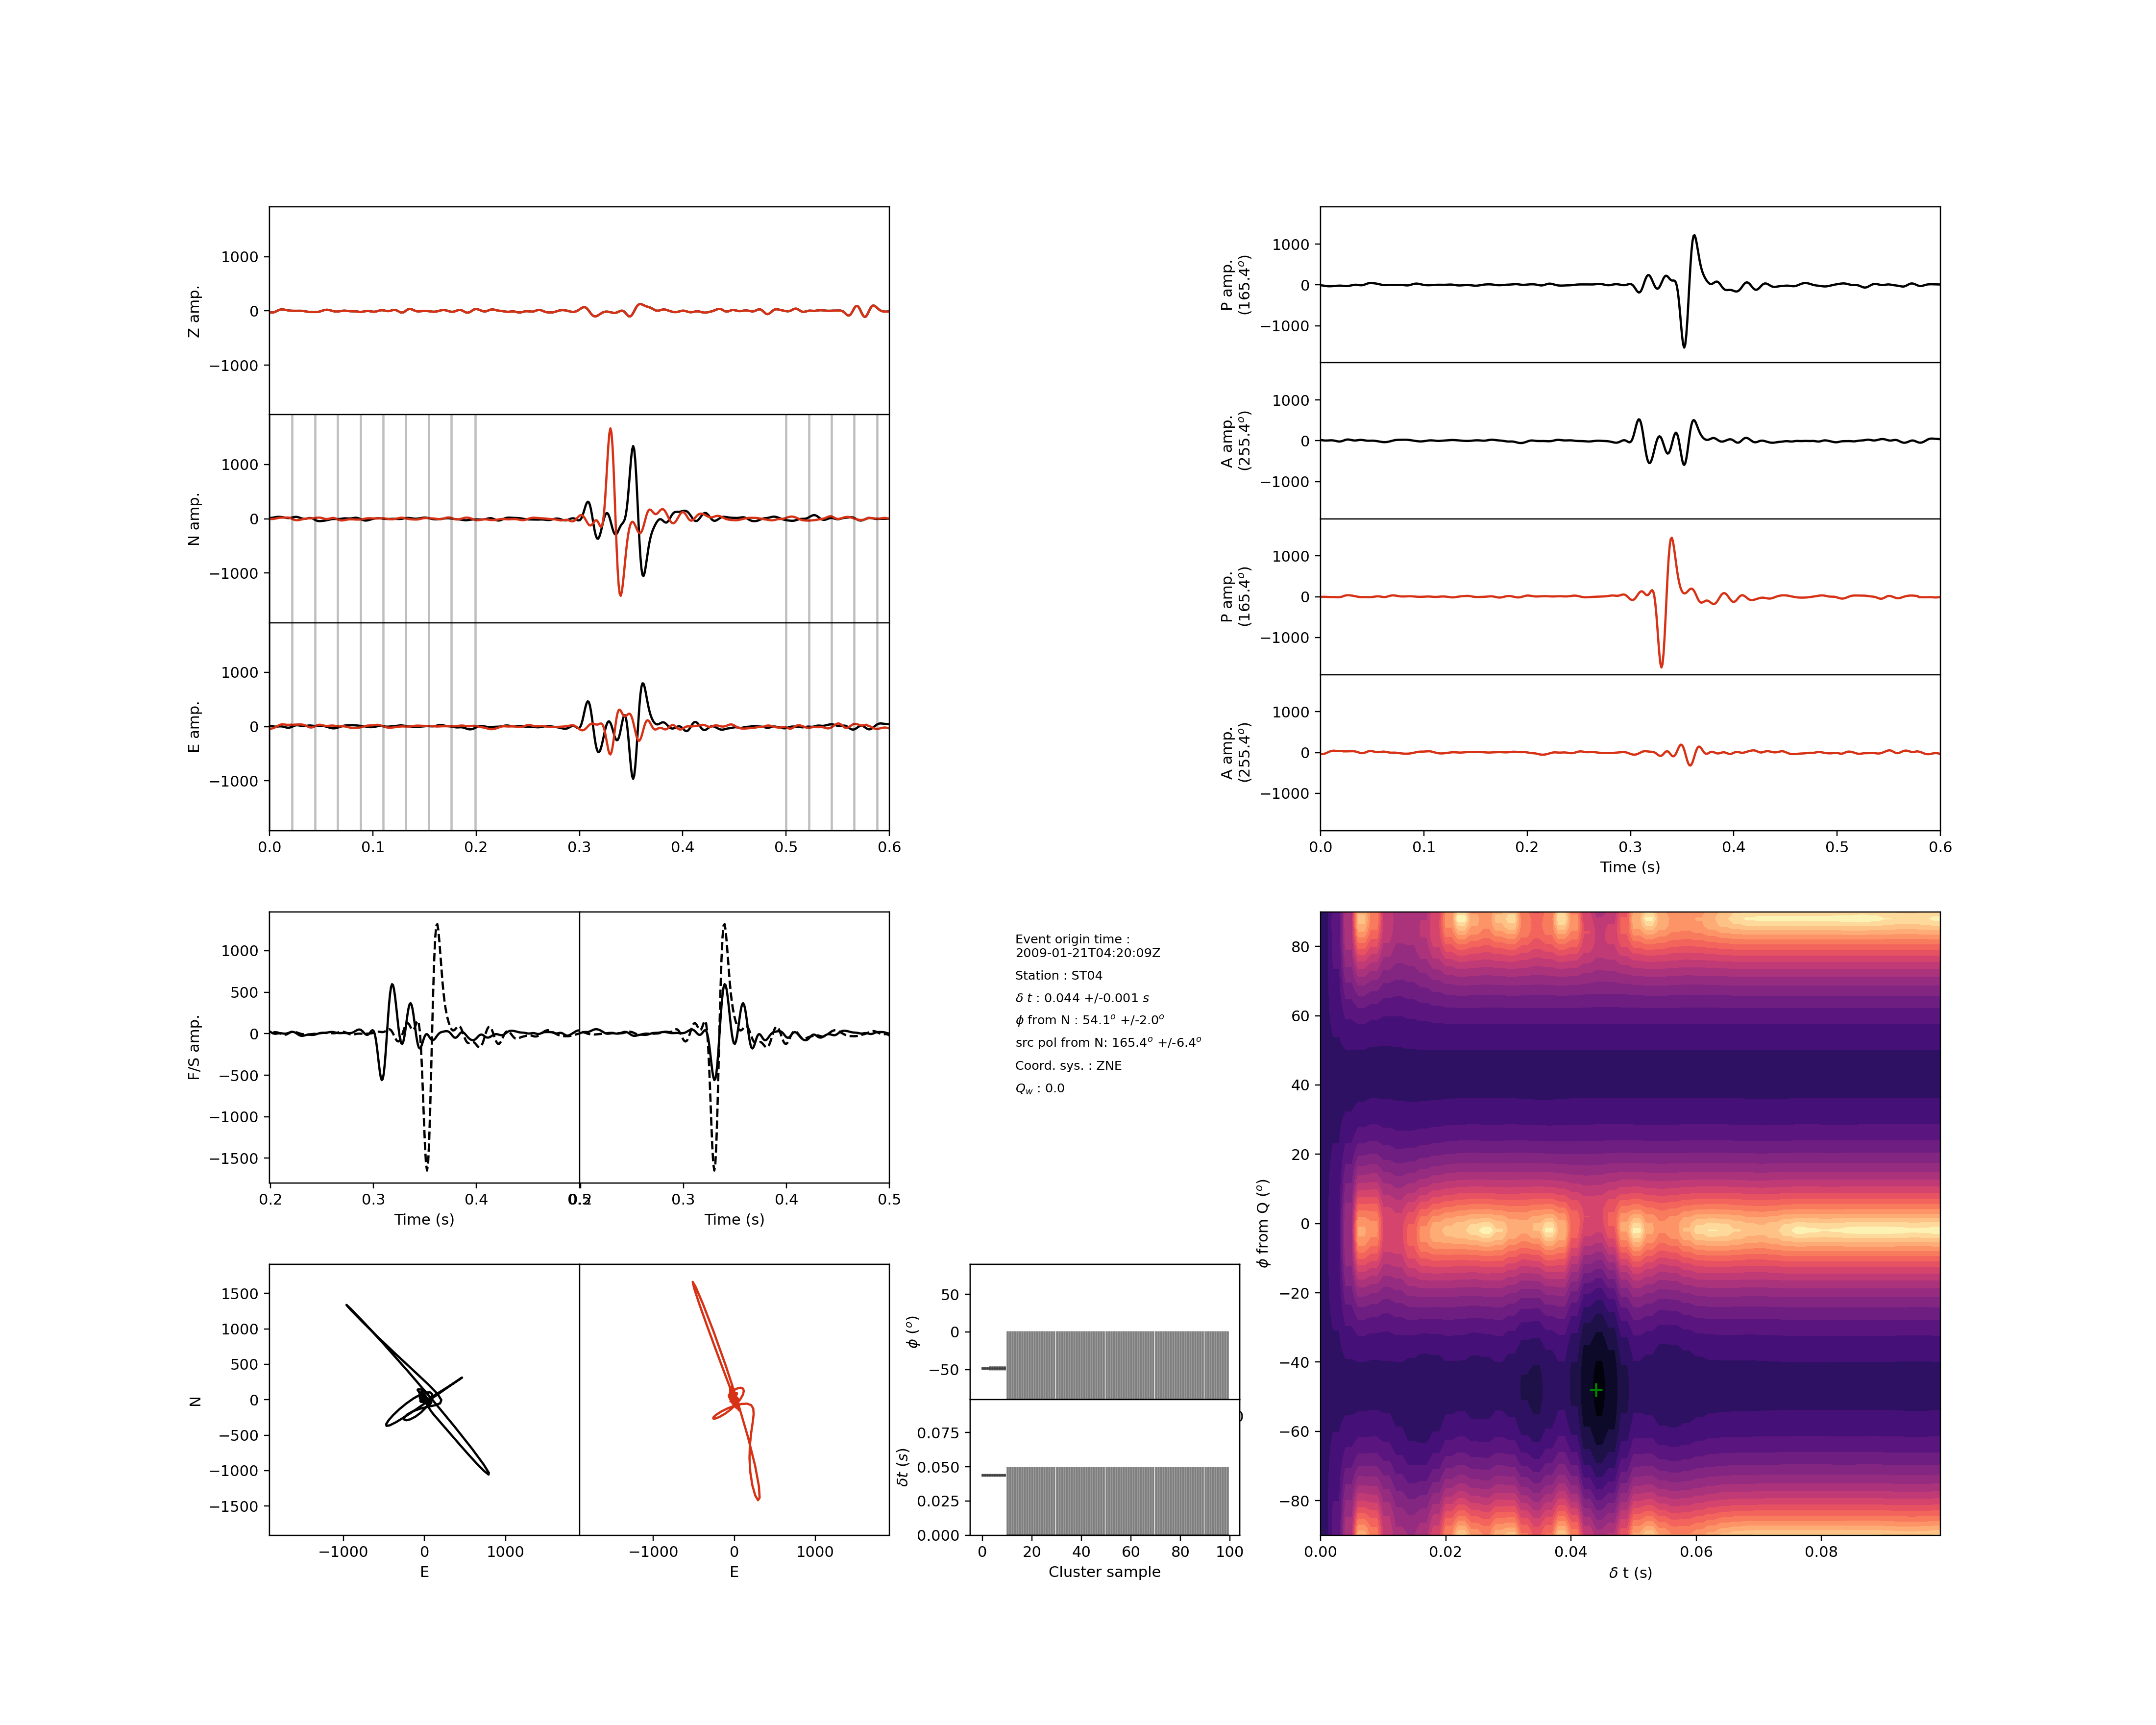

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1295: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


No S phase pick for station: ST08 therefore skipping this station.
Skipping waveform correction for station: ST08
No S phase pick for station: ST06 therefore skipping this station.
Skipping waveform correction for station: ST06
No S phase pick for station: ST10 therefore skipping this station.
Skipping waveform correction for station: ST10


<IPython.core.display.Javascript object>


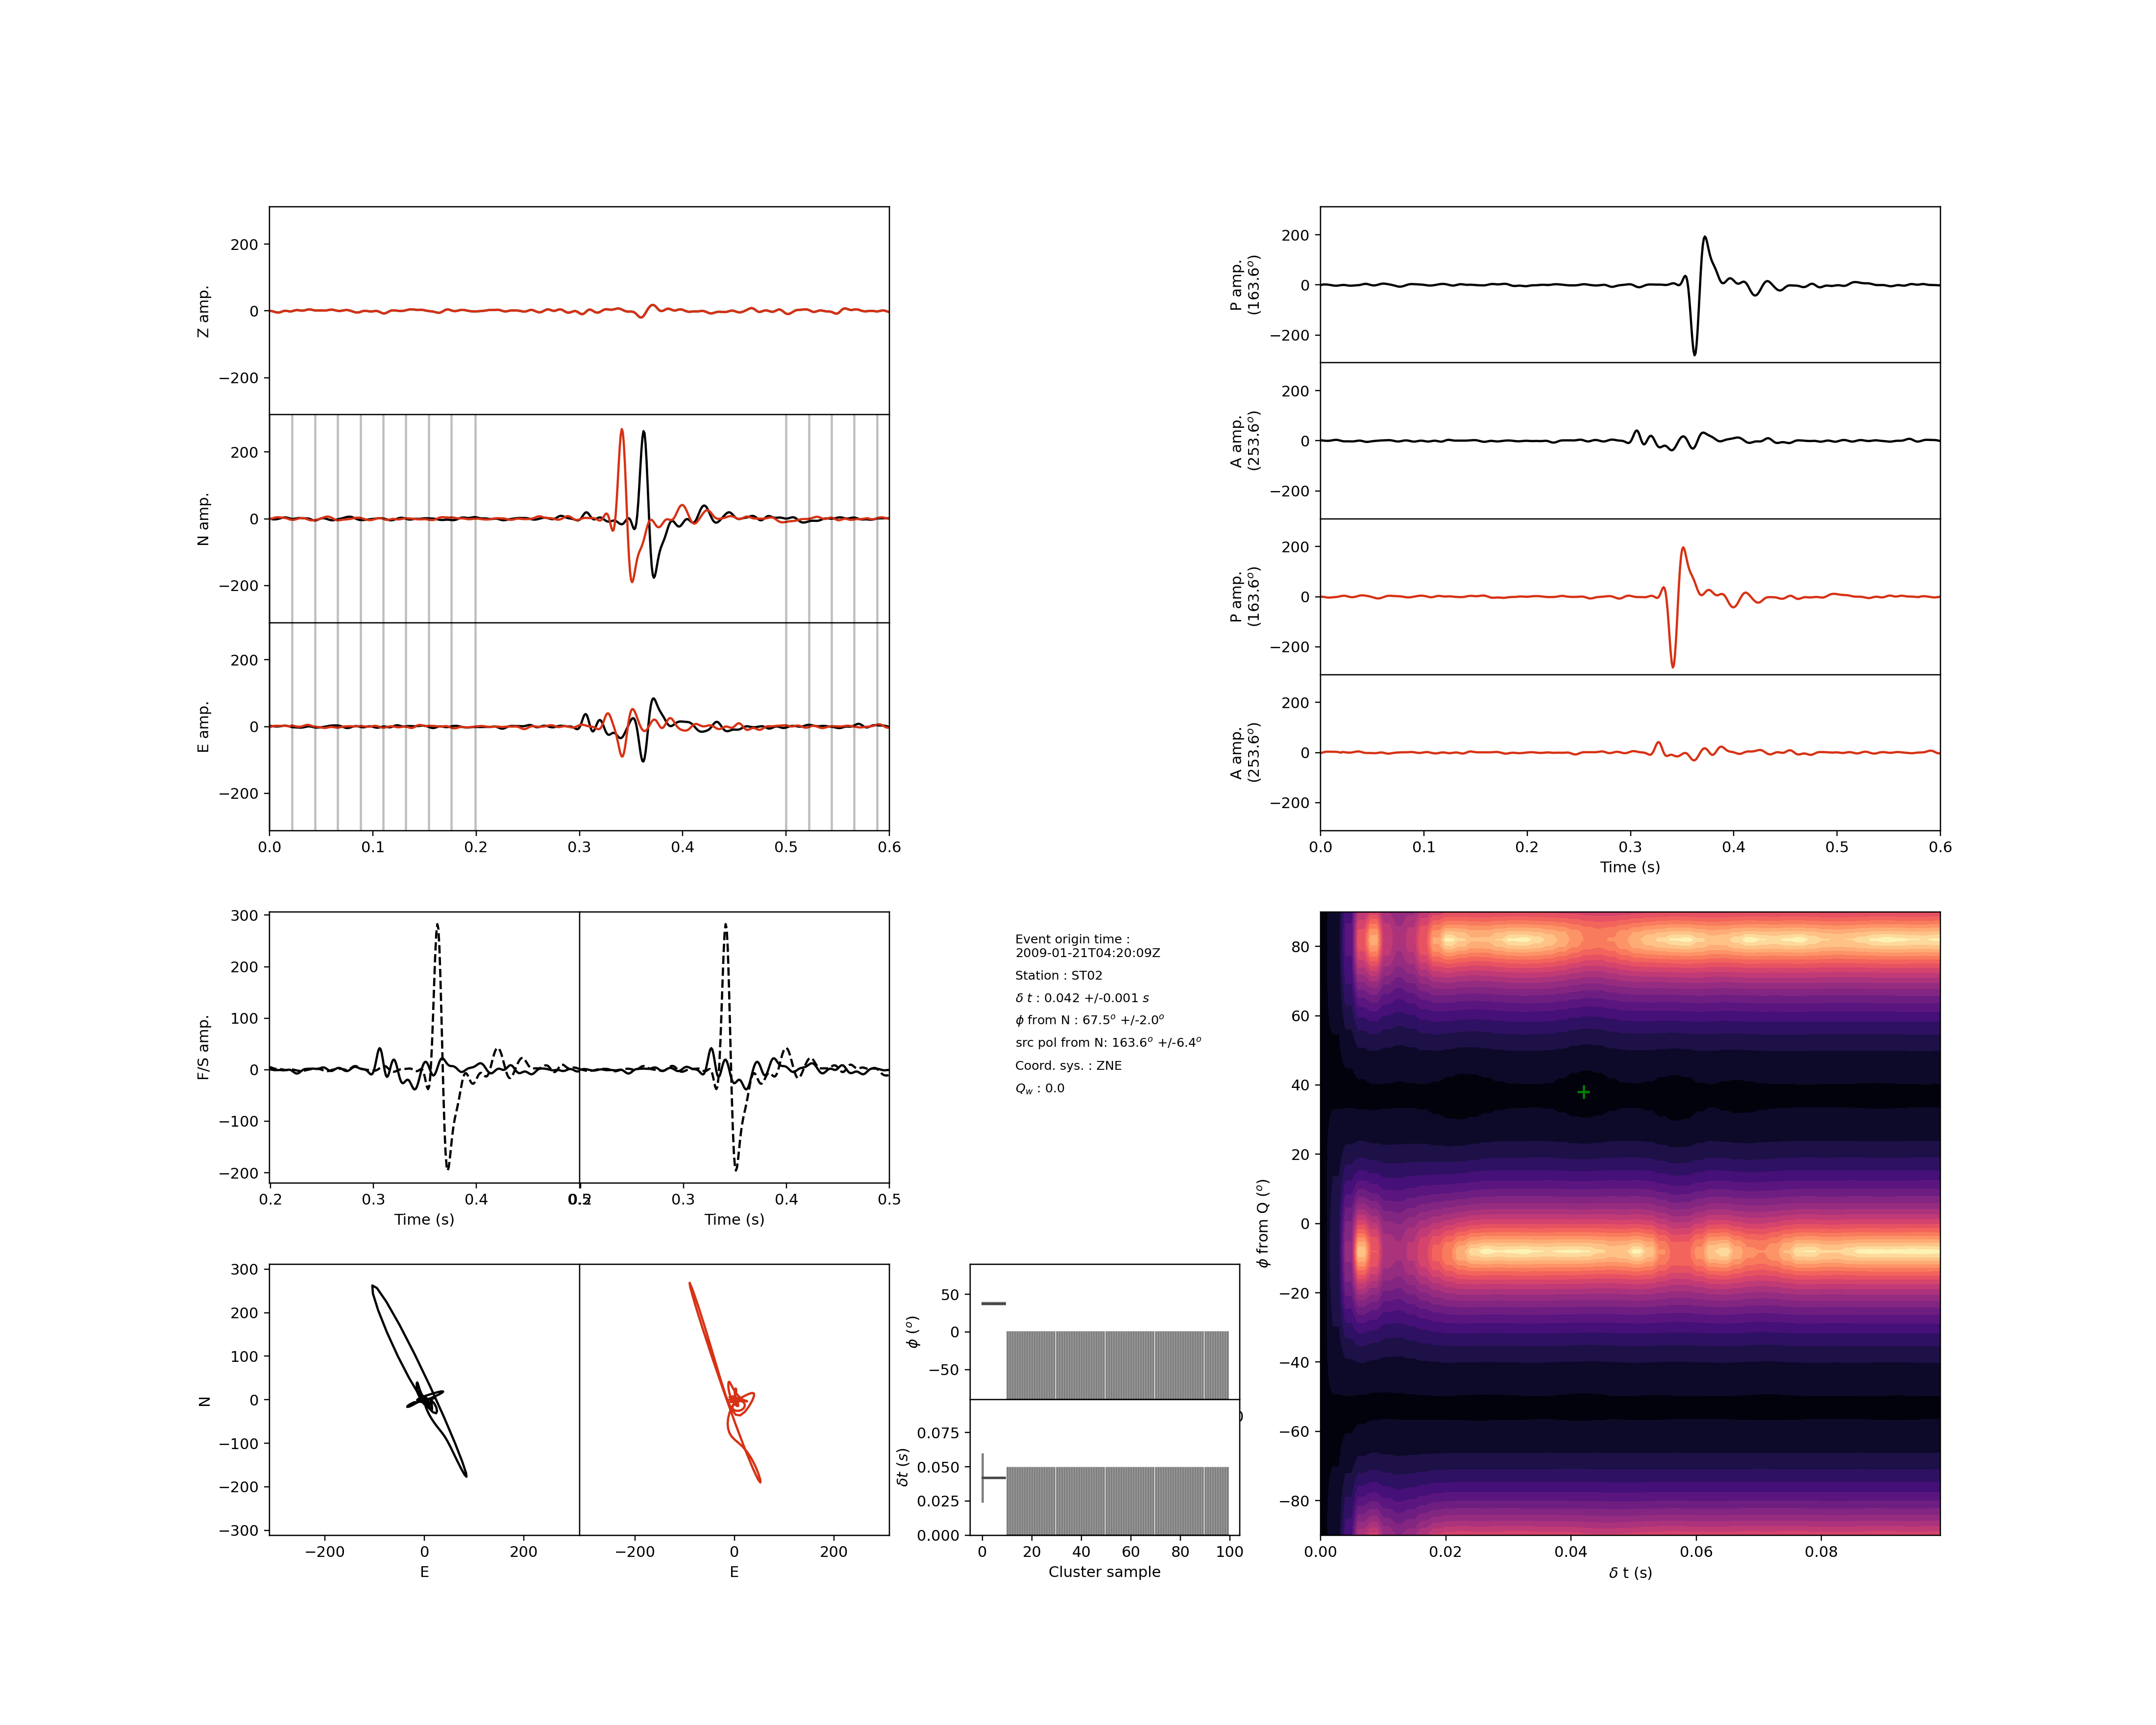

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1295: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>


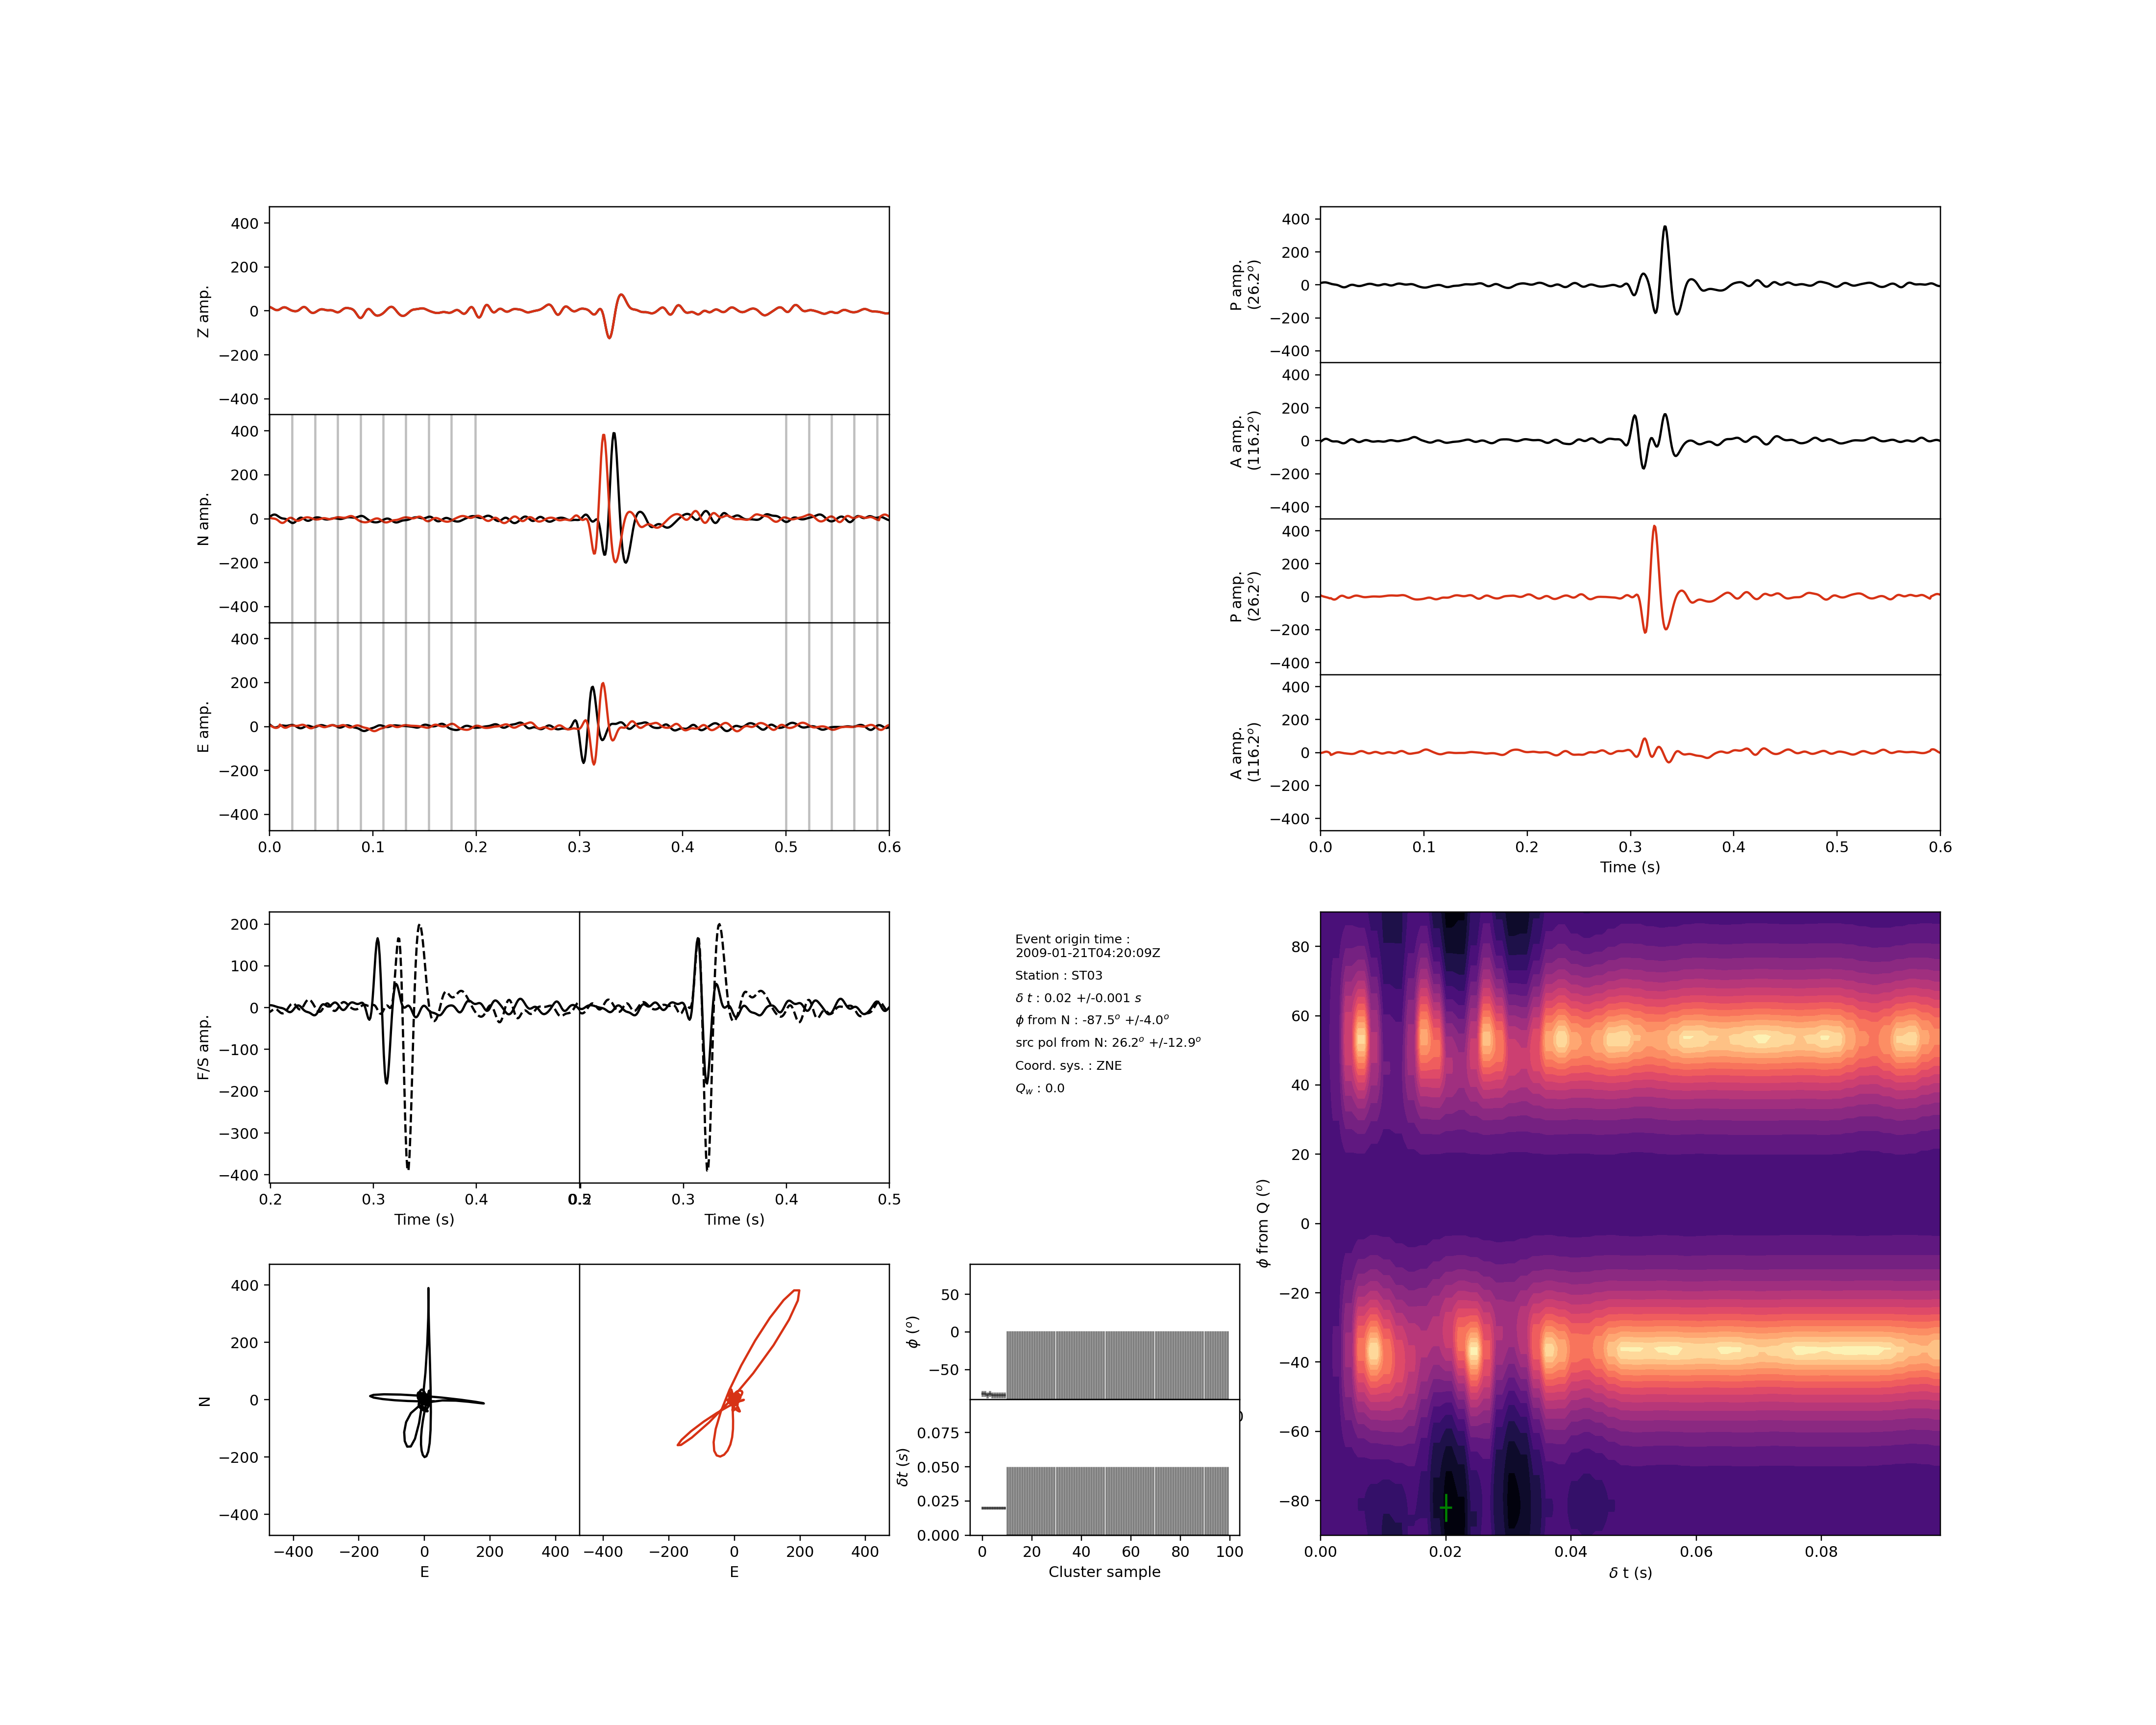

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1295: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


<IPython.core.display.Javascript object>


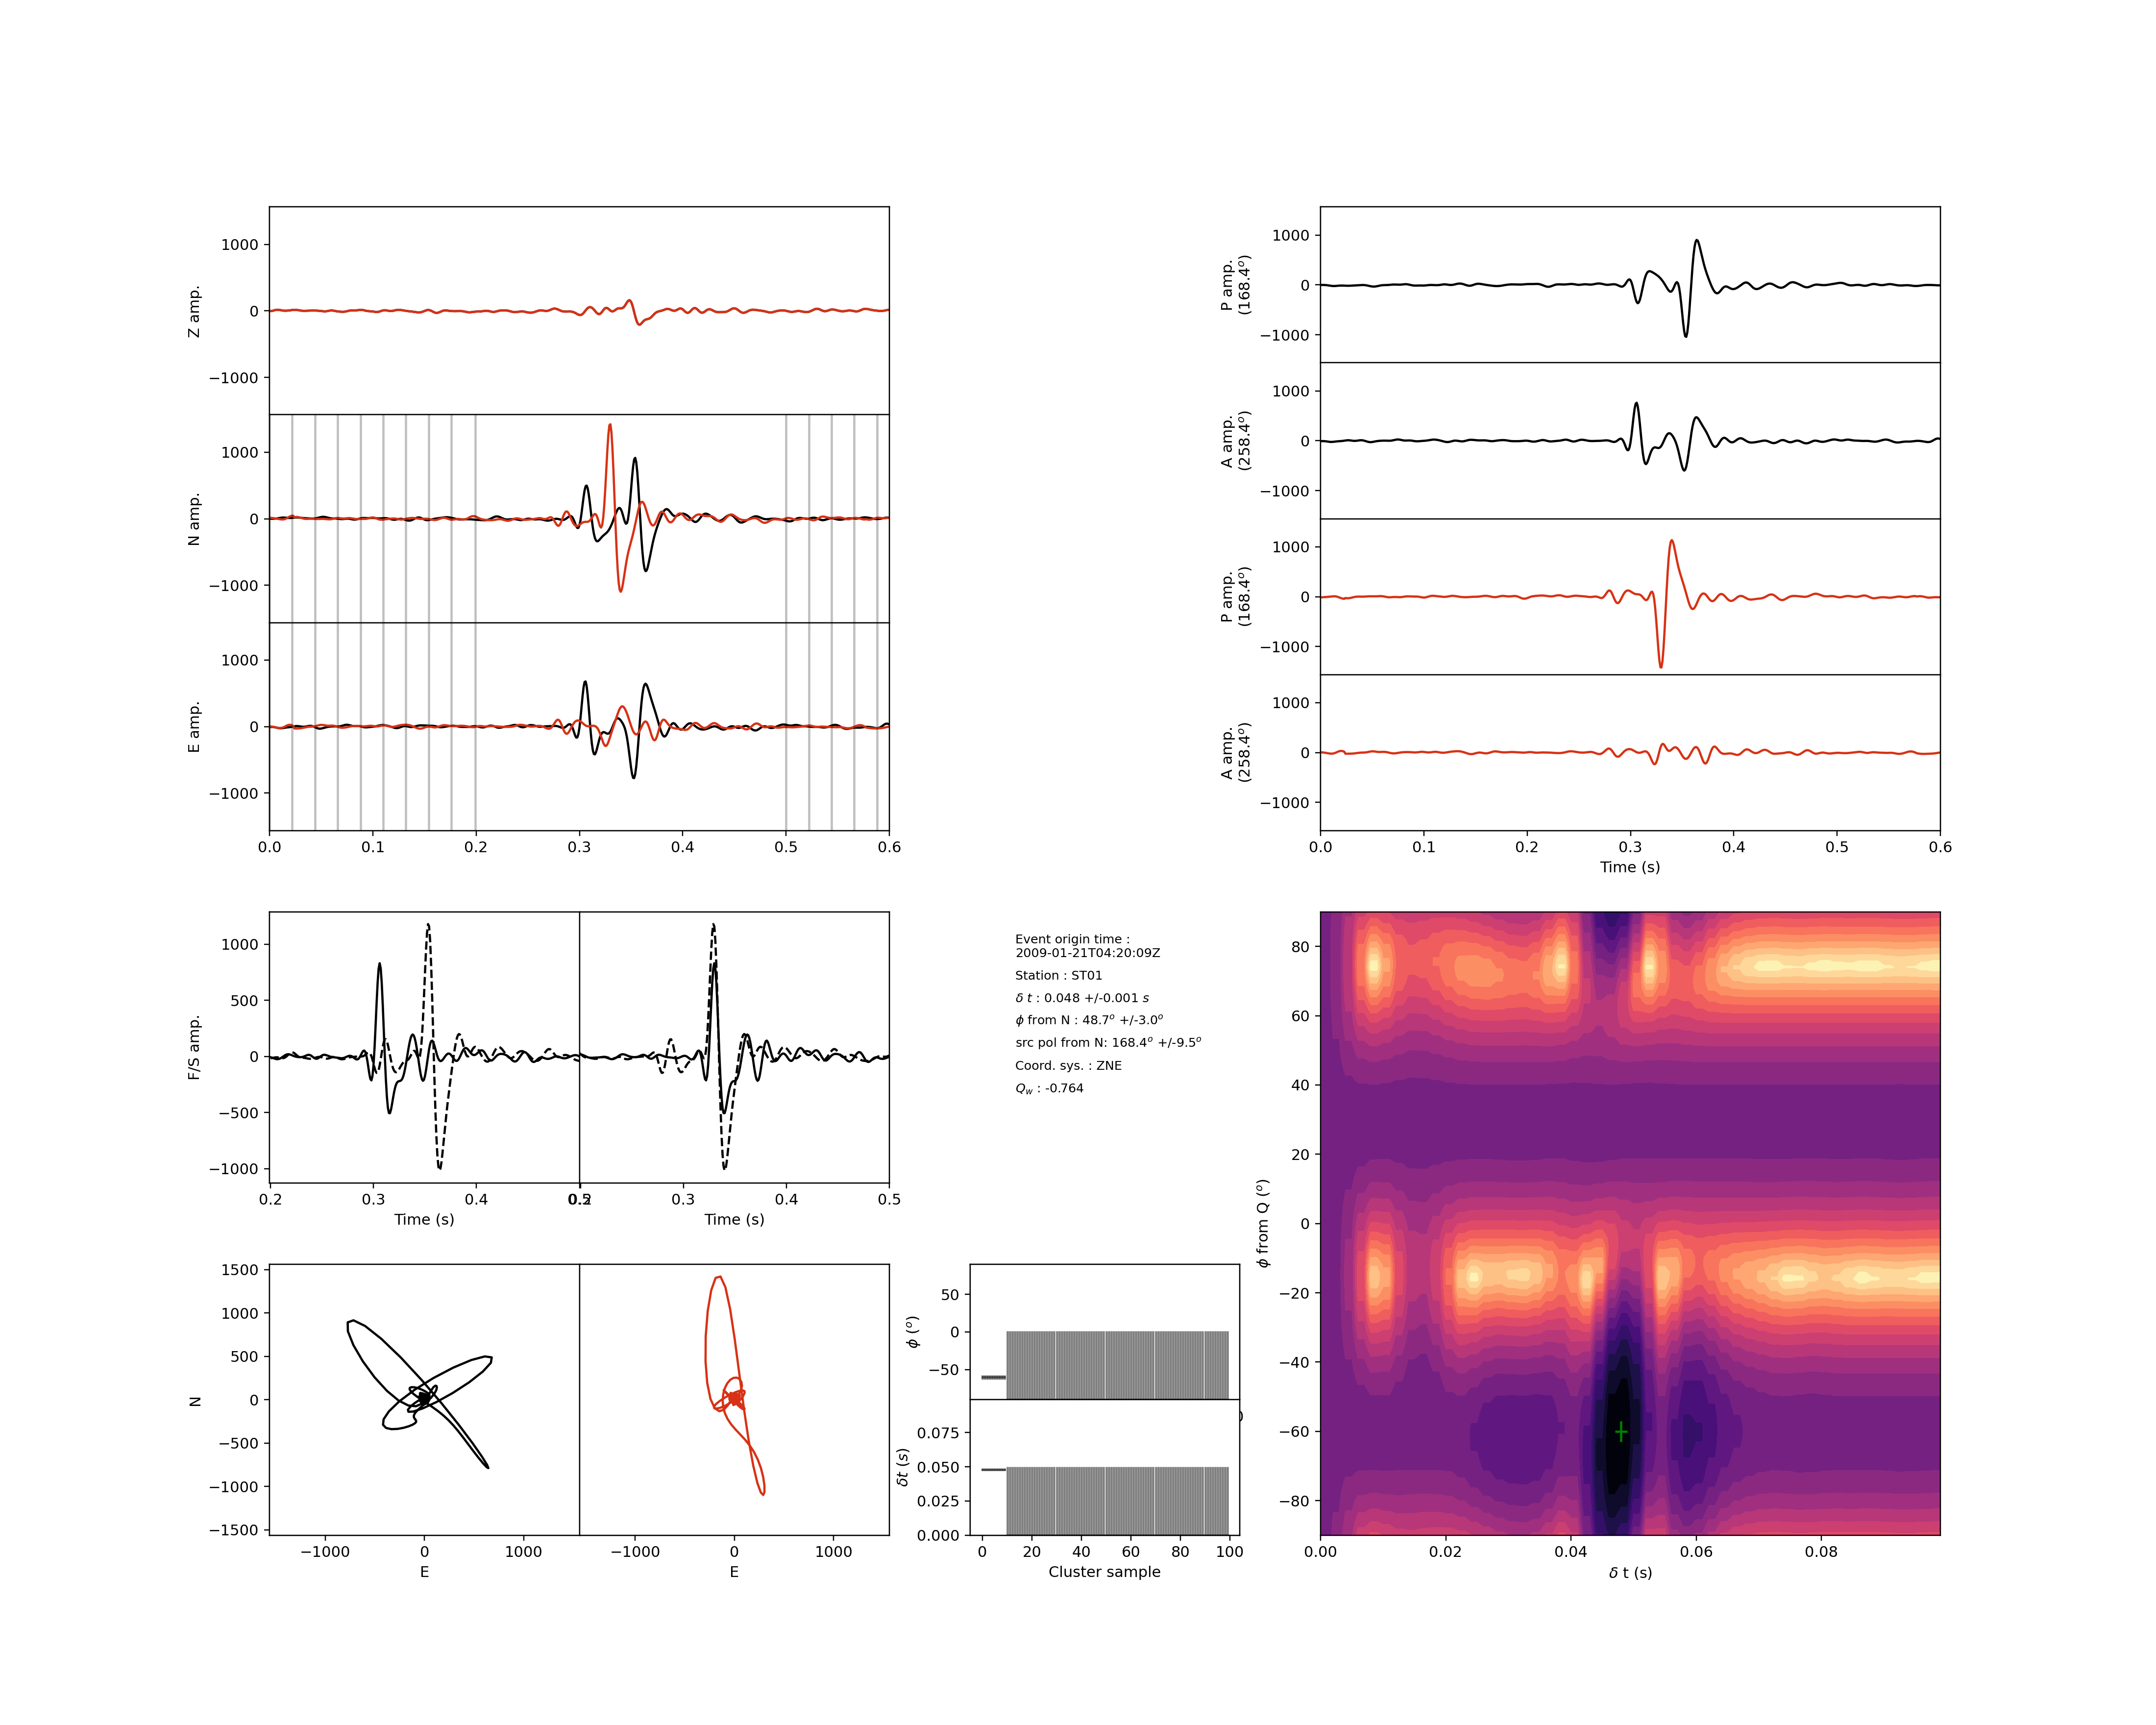

/Users/eart0504/Documents/python/github_repositories/swspy/swspy/splitting/split.py:1295: UserWarning: constrained_layout not applied.  At least one axes collapsed to zero width or height.
  plt.savefig(os.path.join(outdir, ''.join((self.event_uid, "_", station, ".png"))), dpi=300)


No S phase pick for station: ST09 therefore skipping this station.
Skipping waveform correction for station: ST09
No S phase pick for station: ST07 therefore skipping this station.
Skipping waveform correction for station: ST07


In [30]:
splitting_event.plot(outdir='plots')

## 4. Save result:

In [31]:
# And save result to file:
splitting_event.save_result()


Saved sws result to: /Users/eart0504/Documents/python/github_repositories/swspy/examples/icequake_example/20090121042009_sws_result.csv


In [23]:
# # Check data:
# import obspy
# st_ice_flow_corr = obspy.read("data/20090121042009180_ice_flow_dir_corrected.m").trim(starttime=obspy.UTCDateTime("2009-01-21T04:19:59.180000Z")+10, endtime=obspy.UTCDateTime("2009-01-21T04:19:59.180000Z")+13).detrend("demean")
# st_archive = obspy.read("data/mseed/2009/021/*.m").trim(starttime=obspy.UTCDateTime("2009-01-21T04:19:59.180000Z")+10, endtime=obspy.UTCDateTime("2009-01-21T04:19:59.180000Z")+13).detrend("demean")


<IPython.core.display.Javascript object>


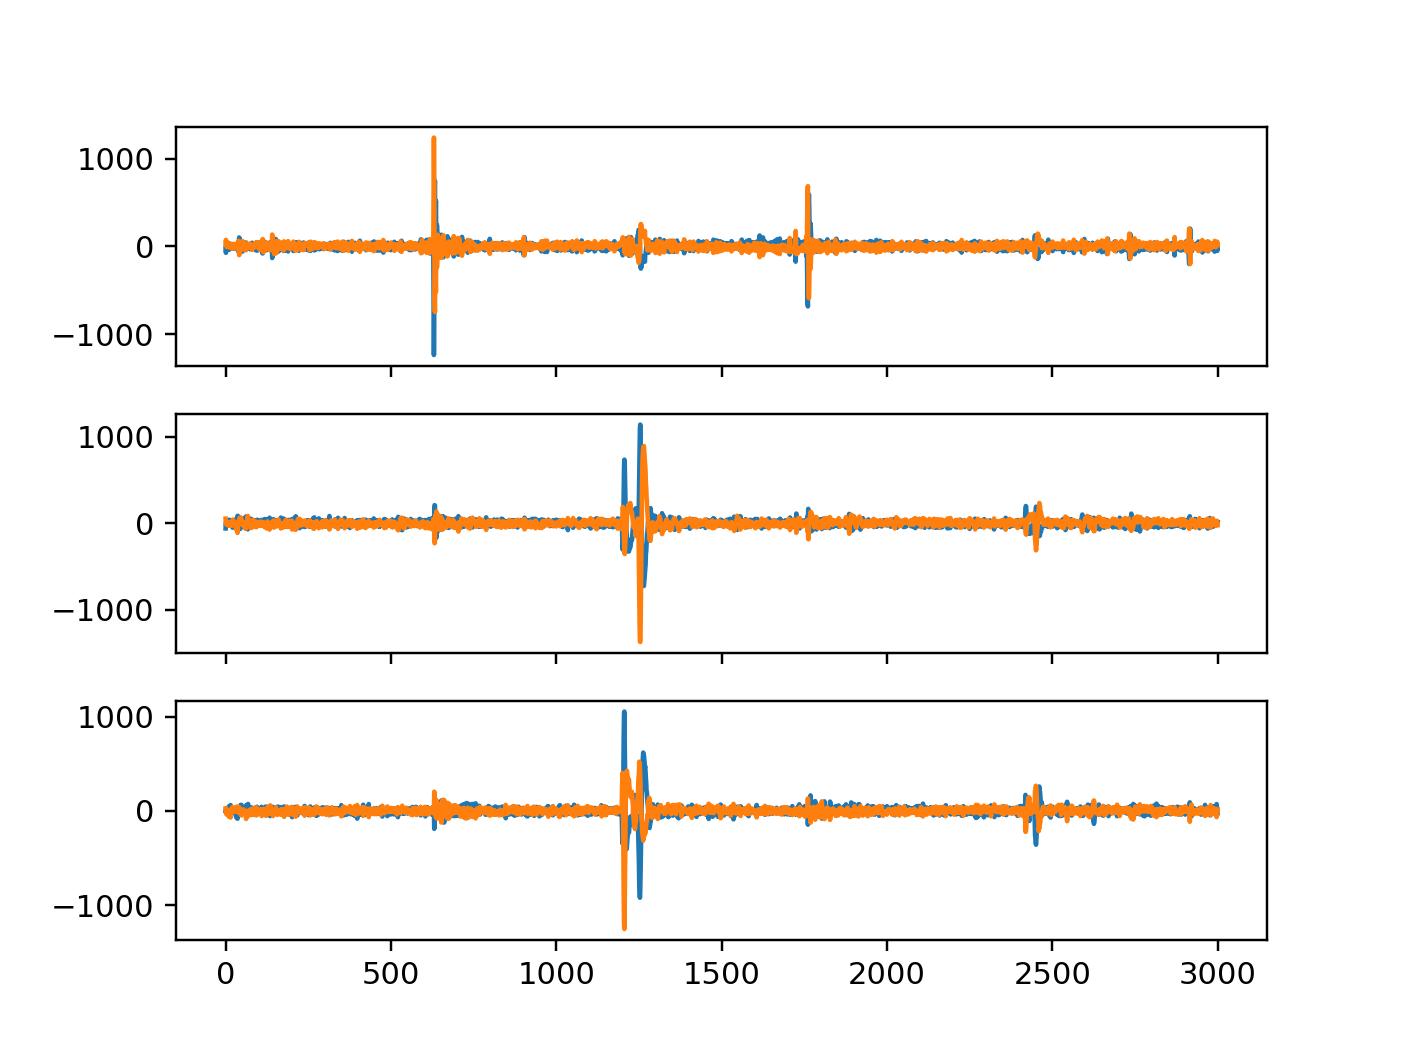

In [24]:


# fig, ax = plt.subplots(nrows=3, sharex=True)
# ax[0].plot(st_ice_flow_corr.select(station="ST01", channel="??Z")[0].data)
# ax[0].plot(st_archive.select(station="ST01", channel="??Z")[0].data)
# ax[1].plot(st_ice_flow_corr.select(station="ST01", channel="??N")[0].data)
# ax[1].plot(st_archive.select(station="ST01", channel="??N")[0].data)
# ax[2].plot(st_ice_flow_corr.select(station="ST01", channel="??E")[0].data)
# ax[2].plot(st_archive.select(station="ST01", channel="??E")[0].data)

# plt.show()


In [25]:
help(swspy.io.load_waveforms)

Help on class load_waveforms in module swspy.io.load:

class load_waveforms(builtins.object)
 |  load_waveforms(path, starttime=None, endtime=None, archive_vs_file='archive', downsample_factor=1, upsample_factor=1)
 |  
 |  A class to load waveforms from file or an archive.
 |  
 |  Notes:
 |  - Will currently only load archived data from the format year/jul_day/*station*
 |  - Does not currently remove instrument response
 |  
 |  Parameters
 |  ----------
 |  path : str
 |      The path to the overall data archive or file to load waveforms from.
 |  
 |  archive_vs_file: str (default = "archive")
 |      Describes what the parameter <path> is associated with. If archive, 
 |      then <path> is to an archive. If file, then <path> is the path to a 
 |      obspy readable file (e.g. mseed). Default is archive.
 |  
 |  starttime : obspy UTCDateTime object
 |      The starttime to cut the data by. Any filters are applied before 
 |      cutting. If not supplied then will load all data f